
## The Data


ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

### Visualizing the Data


-------
Let's take a closer look at the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%config Completer.use_jedi = False



In [2]:
import os 

In [3]:
data_dir = '/Users/nathanamar/Desktop/TensorFlowBT/cell_images'

In [4]:
os.listdir(data_dir)

['test',
 'malaria_detector.h5',
 'train',
 '.ipynb_checkpoints',
 'CNN_Real__IMG.ipynb']

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [7]:
test_path

'/Users/nathanamar/Desktop/TensorFlowBT/cell_images/test/'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
#let's habe a look at a single image

In [11]:
os.listdir(train_path+'parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [12]:
para_cell = train_path+'//parasitized'+'//C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
imread(para_cell).shape # 148 by 142 by 3 : color image

(148, 142, 3)

### Example of a parasitized 

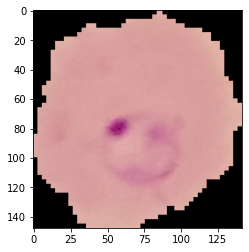

In [14]:
plt.imshow(imread(para_cell))

### Example of uninfected

In [15]:
os.listdir(train_path +'uninfected' )[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

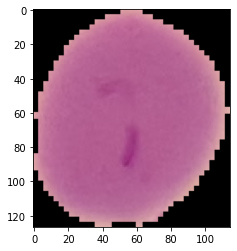

In [16]:
unifected_cell_path = train_path+'//uninfected//'+os.listdir(train_path+'//uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

Inspect the training set

In [17]:
len(os.listdir(train_path+'parasitized'))

12480

In [18]:
len(os.listdir(train_path+'uninfected'))

12480

We have the same amount of parasitized and uninfected

Inspect the test set

In [19]:
len(os.listdir(test_path+'parasitized'))

1300

In [20]:
len(os.listdir(test_path+'uninfected'))

1300

In [21]:
dim1 = []
dim2 = []


for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected//'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

In [22]:
dim1

[127,
 109,
 127,
 118,
 127,
 118,
 133,
 115,
 133,
 142,
 139,
 121,
 124,
 133,
 103,
 148,
 130,
 118,
 127,
 142,
 157,
 175,
 136,
 151,
 121,
 160,
 130,
 139,
 130,
 154,
 130,
 148,
 124,
 136,
 115,
 151,
 127,
 124,
 121,
 121,
 160,
 127,
 145,
 124,
 127,
 124,
 121,
 112,
 121,
 178,
 124,
 145,
 211,
 142,
 157,
 118,
 115,
 145,
 133,
 133,
 121,
 121,
 118,
 136,
 130,
 127,
 160,
 115,
 118,
 142,
 127,
 145,
 118,
 118,
 136,
 121,
 169,
 130,
 130,
 121,
 130,
 139,
 136,
 112,
 97,
 142,
 130,
 124,
 121,
 136,
 94,
 130,
 106,
 163,
 115,
 130,
 109,
 103,
 118,
 124,
 139,
 121,
 115,
 127,
 127,
 121,
 121,
 130,
 103,
 163,
 121,
 184,
 121,
 103,
 124,
 112,
 127,
 139,
 142,
 118,
 154,
 124,
 127,
 145,
 136,
 118,
 118,
 139,
 130,
 157,
 130,
 130,
 133,
 115,
 124,
 151,
 133,
 127,
 148,
 139,
 118,
 151,
 121,
 124,
 136,
 124,
 157,
 130,
 136,
 163,
 133,
 136,
 127,
 169,
 106,
 142,
 115,
 136,
 124,
 118,
 94,
 157,
 133,
 118,
 130,
 139,
 124,
 

/Users/nathanamar/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


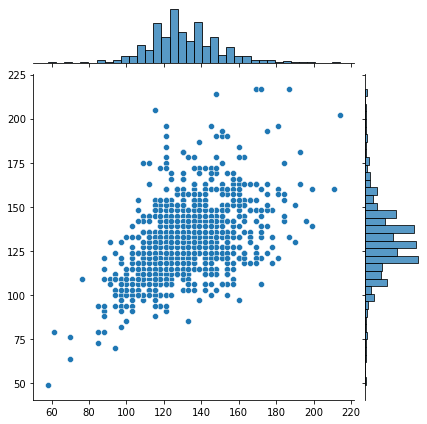

In [23]:
sns.jointplot(dim1,dim2)

We have various dimensions of our image

I need to make sure to reshape the image by the same dimension

In [24]:
np.mean(dim1)

130.92538461538462

In [25]:
np.mean(dim2)

130.75

In [26]:
image_shape = (130,130,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us.

In [27]:
28*28

784

In [28]:
32*32*3

3072

In [29]:
#our file is now
130*130*3#datapoints

50700

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
#help(ImageDataGenerator)

In [32]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

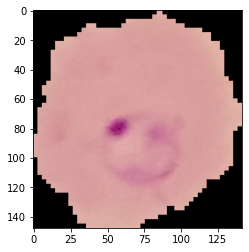

In [33]:
para_img = imread(para_cell)
plt.imshow(para_img)

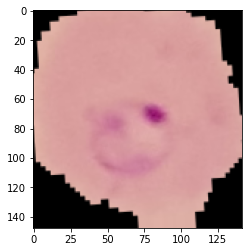

In [34]:
plt.imshow(image_gen.random_transform(para_img))



### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [35]:
train_path

'/Users/nathanamar/Desktop/TensorFlowBT/cell_images/train/'

In [36]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [37]:
os.listdir(train_path)

['parasitized', 'uninfected']

## Creating the model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D

In [39]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters


In [40]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(3,3) , input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3) , input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3) , input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())



model.add(Dense(128,activation='relu'))


# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.

model.add(Dropout(0.5))


# Last layer, remember its binary so we use sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [44]:
batch_size = 16 #image at a time

In [45]:
image_shape[:2]

(130, 130)

## Training the model

In [46]:
train_image_gen = image_gen.flow_from_directory(train_path
                                                ,target_size=image_shape[:2]
                                                ,color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [47]:
test_image_gen = image_gen.flow_from_directory(test_path
                                                ,target_size=image_shape[:2]
                                                ,color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle =False)

Found 2600 images belonging to 2 classes.


In [48]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [49]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [50]:
#results = model.fit_generator(train_image_gen,epochs=20,
#                              validation_data=test_image_gen,
#                             callbacks=[early_stop])

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model = load_model('malaria_detector.h5')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [54]:
#model.evaluate_generator(test_image_gen)

In [55]:
model.metrics_names

['loss', 'accuracy']

## Evaluating the model

In [56]:
#pred = model.predict_generator(test_image_gen)

In [57]:
#pred = pred > 0.5

In [58]:
#len(pred)

In [59]:
#from sklearn.metrics import classification_report,confusion_matrix
#print(classification_report(test_image_gen.classes,predictions))

#confusion_matrix(test_image_gen.classes,predictions)

## Predicting on an image

In [60]:
para_cell

'/Users/nathanamar/Desktop/TensorFlowBT/cell_images/train///parasitized//C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [61]:
import tensorflow as tf


In [62]:
my_image= tf.keras.preprocessing.image.load_img(para_cell,target_size=image_shape)

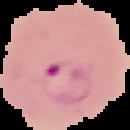

In [63]:
my_image

In [64]:
type(my_image)

PIL.Image.Image

In [65]:
my_image =  tf.keras.preprocessing.image.img_to_array(my_image)

In [66]:
type(my_image)

numpy.ndarray

In [67]:
my_image.shape

(130, 130, 3)

In [68]:
my_image = np.expand_dims(my_image, axis=0)

In [69]:
my_image.shape

(1, 130, 130, 3)

In [70]:
#model.predict(my_image)
#[0]